In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


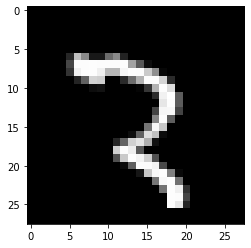

In [3]:
plt.imshow(x_train[500], cmap="gray")

In [4]:
x_train = x_train/255.

In [5]:
x_test = x_test/255.

In [6]:
x_train[0].shape

(28, 28)

In [7]:
encoder_input = keras.Input(shape=(28,28,1), name="img")
x = keras.layers.Flatten()(encoder_input)
encoder_out = keras.layers.Dense(64, activation="relu")(x)

2021-12-17 17:38:10.420012: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-12-17 17:38:10.420119: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abdelhak-X555UJ): /proc/driver/nvidia/version does not exist
2021-12-17 17:38:10.420831: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
encoder = keras.Model(encoder_input, encoder_out, name="encoder")

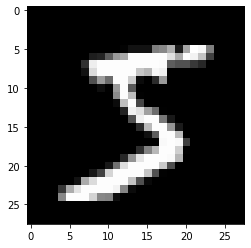

In [9]:
plt.imshow(x_train[0], cmap="gray")

In [10]:
x_train[0].shape


(28, 28)

In [11]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')


In [12]:
x = keras.layers.Flatten()(encoder_input)


In [13]:
encoder_output = keras.layers.Dense(64, activation="relu")(x)


In [14]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')


In [15]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)


In [16]:
x = keras.layers.Dense(784, activation="relu")(decoder_input)


In [17]:
decoder_output = keras.layers.Reshape((28, 28, 1))(x)


In [18]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)


/home/abdelhak/anaconda3/envs/encoder/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [19]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')


In [20]:
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 105,360
Trainable params: 105,360
Non-trainable params: 0
_________________________________________________

In [21]:
autoencoder.compile(opt, loss='mse')


In [22]:
epochs=3

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1, 
      batch_size=32, validation_split=0.10
        )   
    autoencoder.save(f"models/AE-{epoch+1}.model")

2021-12-17 17:38:18.423359: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.
2021-12-17 17:38:19.127009: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.
2021-12-17 17:38:19.789887: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1688/1688 [==============================] - 9s 4ms/step - loss: 0.0214 - val_loss: 0.0150


2021-12-17 17:38:29.642676: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/AE-1.model/assets


2021-12-17 17:38:30.946107: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.


  17/1688 [..............................] - ETA: 5s - loss: 0.0148

2021-12-17 17:38:31.479914: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 [==============================] - 7s 4ms/step - loss: 0.0142 - val_loss: 0.0136
INFO:tensorflow:Assets written to: models/AE-2.model/assets


2021-12-17 17:38:40.571749: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 [==============================] - 8s 5ms/step - loss: 0.0133 - val_loss: 0.0130
INFO:tensorflow:Assets written to: models/AE-3.model/assets


In [23]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])


In [24]:
print(example[0].shape)
print(example[0])


(64,)
[1.934394   1.2699592  1.5623329  0.3209718  1.2989218  1.3186135
 2.0299335  0.         0.         0.472505   2.2434673  2.6076272
 1.0009007  1.1784184  1.9641362  1.086905   1.6549085  0.47315583
 0.         0.33655736 2.2557323  0.88696146 0.90637726 1.789779
 3.0993555  1.1671822  0.56220514 1.2001313  0.         1.890345
 0.23923063 0.20428878 1.2651078  1.1118758  0.         0.8778074
 0.         1.1874318  1.2773175  1.8145347  2.2101228  3.5908115
 1.5103058  2.1732485  0.         1.8171968  1.0329976  0.6338739
 2.0452564  1.5488306  3.026658   1.6693038  1.1208129  2.3611522
 1.1958444  1.5440571  2.082672   1.1515905  0.         1.5920919
 0.         1.6608183  1.6983844  0.        ]


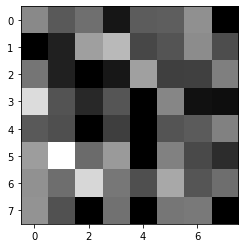

In [25]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")


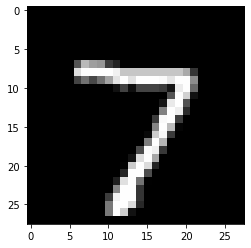

In [26]:
plt.imshow(x_test[0], cmap="gray")


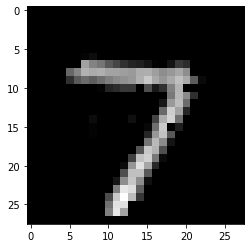

In [27]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")

In [28]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
